In [1]:
# missing requirements:
# !pip install PyGLM
#!pip install matplotlib-label-lines
# AdaBins
# labelLines seems like a silly, unnecessary dependency. But whatever.
#No module named 'CLIP'
#prob need taming transformers too?
# model git clone operations after: https://colab.research.google.com/drive/1iLdYrjtEYLDs_KpLbZOUEVlZpEgY3E8b#scrollTo=wSfISAhyPmyp
#! git clone https://github.com/openai/CLIP.git # uh... it's already there?

In [2]:
!nvidia-smi

Sat Nov 27 09:39:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.06       Driver Version: 510.06       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   28C    P8     7W / 350W |    417MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch.nn as nn

In [4]:
import pytti
#import pytti.Image

In [5]:
# No module named 'glm' 
# invoked in pytti.Transforms, which exports apply_flow into OpticalFlowLoss
# Looks like this is PyGLM, interface to OpenGL Math library
# https://github.com/g-truc/glm
# https://github.com/Zuzu-Typ/PyGLM ### SECRET SAUCE ALERT
#
# !pip install PyGLM
#
# yup that fixed it

##############################
#\proj\pytti\LossAug\DepthLoss.py in <module>
#from infer import InferenceHelper
#ModuleNotFoundError: No module named 'infer'
#
# Maybe something to do with AdaBins?
# https://github.com/shariqfarooq123/AdaBins/issues/7
#
# Yeah, for sure an AdaBins thing. Let's deal with that later. 
# Pivot to explicit imports from Image rather than importing whole module.
# Should let me keep moving forward?

In [6]:
#import pytti.Image

In [7]:
from pytti.Image import VQGANImage # nope, still an issue.
# it's attached to PixelImage, which gets imported in pytti.Image.__init__
# commented out that one import, shit's working again.
#### SECRET SAUCE ALERT <-- AdaBins is a component of the pixelation trick
#
# VQGANImage is a subtype of DifferentiableImage

In [8]:
help(VQGANImage.init_vqgan)

Help on function init_vqgan in module pytti.Image.VQGANImage:

init_vqgan(model_name, device=device(type='cuda', index=0))



In [9]:
from pytti.Image.VQGANImage import VQGAN_MODEL_NAMES

In [10]:
VQGAN_MODEL_NAMES # part of the colab UI, presumably

['imagenet', 'coco', 'wikiart', 'sflckr', 'openimages']

In [11]:
!nvidia-smi

Sat Nov 27 09:39:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.06       Driver Version: 510.06       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   28C    P8    12W / 350W |    417MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
model_idx = 0
model_name = VQGAN_MODEL_NAMES[model_idx]
VQGANImage.init_vqgan(model_name=model_name)
# WARNING: VQGAN config file imagenet.yaml not found. Initializing download.
# WARNING: VQGAN checkpoint file imagenet.ckpt not found. Initializing download.
# nice. looking good.

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips\vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from imagenet.ckpt


In [13]:
img = VQGANImage(width=200, height=200) # is this right?

In [14]:
from pytti.ImageGuide import DirectImageGuide
# had to install labelLines to get this part to work.

In [15]:
help(DirectImageGuide)

Help on class DirectImageGuide in module pytti.ImageGuide:

class DirectImageGuide(builtins.object)
 |  DirectImageGuide(image_rep, embedder, optimizer=None, lr=None, **optimizer_params)
 |  
 |  Image guide that uses an optimizer and torch autograd to optimize an image representation
 |  Based on the BigGan+CLIP algorithm by advadnoun (https://twitter.com/advadnoun)
 |  image_rep: (DifferentiableImage) image representation
 |  embedder: (Module)               image embedder
 |  optimizer: (Class)               optimizer class to use. Defaults to Adam
 |  all other arguments are passed as kwargs to the optimizer.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, image_rep, embedder, optimizer=None, lr=None, **optimizer_params)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  clear_dataframe(self)
 |  
 |  plot_losses(self, axs)
 |  
 |  run_steps(self, n_steps, prompts, interp_prompts, loss_augs, stop=-inf, interp_steps=0, i_offset=0, skipped_steps=0

In [16]:
from pytti import Perceptor
# had to add __init__.py to CLIP directory 
# and changed import in pytti.Perceptor
# oh.... I think I was actually supposed to install CLIP? It has a setup.py...

In [17]:
!nvidia-smi

Sat Nov 27 09:39:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.06       Driver Version: 510.06       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   31C    P2   102W / 350W |   1846MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
import pytti.CLIP # it's a little funny but whatever

available_clip_models = pytti.CLIP.clip.available_models()
#Perceptor.init_clip(available_clip_models)
Perceptor.init_clip([available_clip_models[-1]])
# nice
#Perceptor.free_clip()

In [19]:
!nvidia-smi

Sat Nov 27 09:39:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.06       Driver Version: 510.06       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   29C    P8    16W / 350W |   2152MiB / 24576MiB |     37%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
from pytti.Perceptor.Embedder import HDMultiClipEmbedder

emb = HDMultiClipEmbedder()

In [21]:
guide = DirectImageGuide(image_rep=img, embedder=emb)
# 2 required positional arguments: 'image_rep' and 'embedder'
# image_rep: (DifferentiableImage) image representation
# embedder: (Module)               image embedder

In [22]:
!nvidia-smi

Sat Nov 27 09:39:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.06       Driver Version: 510.06       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   29C    P8    15W / 350W |   2152MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
# just for my reference, 

# from pytti.__init__
###########################
#def format_input(tensor, source, dest):
#  return named_rearrange(tensor, source.output_axes, dest.input_axes)

# from pytti.ImageGuide.DirectImageGuide.train
###########################
#    prompt_losses = {prompt:prompt(format_input(image_embeds, self.embedder, prompt),
#                                   format_input(offsets, self.embedder, prompt),
#                                   format_input(sizes, self.embedder, prompt)) for prompt in prompts}



In [24]:
#oh baby
help(guide.run_steps)
# run_steps(
#  n_steps, prompts, interp_prompts, loss_augs, 
#  stop=-inf, interp_steps=0, i_offset=0, skipped_steps=0)

#prompts: (ClipPrompt list) list of prompts
#n_steps: (positive integer) steps to run
#returns: the number of steps run

# Looks like I need to define a ClipPrompt class
# Probably a Prompt class in the original notebook or somethign like that

Help on method run_steps in module pytti.ImageGuide:

run_steps(n_steps, prompts, interp_prompts, loss_augs, stop=-inf, interp_steps=0, i_offset=0, skipped_steps=0) method of pytti.ImageGuide.DirectImageGuide instance
    runs the optimizer
    prompts: (ClipPrompt list) list of prompts
    n_steps: (positive integer) steps to run
    returns: the number of steps run



In [25]:
# temporary workaround
from dataclasses import dataclass

@dataclass
class Args:
    prompts = ['a painting of an apple']
    
args = Args()

In [26]:
# modified from
#https://colab.research.google.com/drive/1iLdYrjtEYLDs_KpLbZOUEVlZpEgY3E8b#scrollTo=EXMSuW2EQWsd

# Naw fuck that, check out pytti.Perceptor.Prompt
#class Prompt(nn.Module):
#class ClipPrompt(nn.Module):
#    def __init__(self, embed, weight=1., stop=float('-inf')):
#        super().__init__()
#        self.register_buffer('embed', embed)
#        self.register_buffer('weight', torch.as_tensor(weight))
#        self.register_buffer('stop', torch.as_tensor(stop))
# 
#    def forward(self, input):
#        input_normed = F.normalize(input.unsqueeze(1), dim=2)
#        embed_normed = F.normalize(self.embed.unsqueeze(0), dim=2)
#        dists = input_normed.sub(embed_normed).norm(dim=2).div(2).arcsin().pow(2).mul(2)
#        dists = dists * self.weight.sign()
#        return self.weight.abs() * replace_grad(dists, torch.maximum(dists, self.stop)).mean()
 
# modified from
#https://colab.research.google.com/drive/1iLdYrjtEYLDs_KpLbZOUEVlZpEgY3E8b#scrollTo=EXMSuW2EQWsd

#pMs = []

#for prompt in args.prompts:
#for prompt in args.prompts:
#    txt, weight, stop = parse_prompt(prompt)
#    embed = perceptor.encode_text(clip.tokenize(txt).to(device)).float()
#    pMs.append(Prompt(embed, weight, stop).to(device))

In [27]:
from pytti.Perceptor.Prompt import Prompt, MultiClipImagePrompt, parse_prompt
# ugh the CLIP thing...

In [28]:
pytti.Perceptor.CLIP_PERCEPTORS

[CLIP(
   (visual): VisionTransformer(
     (conv1): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
     (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
     (transformer): Transformer(
       (resblocks): Sequential(
         (0): ResidualAttentionBlock(
           (attn): MultiheadAttention(
             (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
           )
           (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
           (mlp): Sequential(
             (c_fc): Linear(in_features=768, out_features=3072, bias=True)
             (gelu): QuickGELU()
             (c_proj): Linear(in_features=3072, out_features=768, bias=True)
           )
           (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
         )
         (1): ResidualAttentionBlock(
           (attn): MultiheadAttention(
             (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, 

In [29]:
#Perceptor.free_clip()

In [30]:
# oh shit... that executed?
prompt = "a painting of an apple"
out = parse_prompt(embedder=emb, prompt_string=prompt)
 # maybe?

In [31]:
pdb

Automatic pdb calling has been turned ON


In [32]:
!nvidia-smi

Sat Nov 27 09:39:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.06       Driver Version: 510.06       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   29C    P8    15W / 350W |   2154MiB / 24576MiB |     10%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [33]:
Perceptor.free_clip()

In [34]:
pytti.Perceptor.CLIP_PERCEPTORS

In [35]:
!nvidia-smi

Sat Nov 27 09:39:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.06       Driver Version: 510.06       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   29C    P8    15W / 350W |   2154MiB / 24576MiB |     10%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [36]:
type(out)

pytti.Perceptor.Prompt.Prompt

In [37]:
#guide.run_steps(
#    n_steps=100,
#    #prompts=out, # prompt object is not iterable
#    prompts=[out],
#    # uh....
#    interp_prompts=None, # interpolation?
#    loss_augs=None # this can't be None
#)
# run_steps(
#  n_steps, prompts, interp_prompts, loss_augs, 
#  stop=-inf, interp_steps=0, i_offset=0, skipped_steps=0)

# guessing this is gonna break, but let's see what happens
# oh neat, it killed CUDA. That's probably why the mechanisms for releasing models are there
# Try releasing CLIP (and only loading one VQGAN model)

In [38]:
#mse_loss = MSELoss()
# comp dimensions should map to image shape
# guessing this is lifted/inspired by dribnet/pixray's loss interface
# https://github.com/dribnet/pixray

# Let's try a loss function that doesn't have the 'comp' argument...
from pytti.LossAug import TVLoss
loss_augs = [TVLoss()]

# This is almost surely what pytti.build_loss is for
# - build_loss(weight_name, weight, name, img, pil_target)
#    - oof, no defaults.
#    - start with weight_name='direct'
#    - img is the VQGANImage object (nb: get_preferred_loss method)
#    * pil_target
#      - PIL.Image object
#      - if not provided, tries to open image using text from prompt string
#      - output image?

In [39]:
from pytti.LossAug import MSELoss
#loss_augs = [MSELoss]
# pretty sure this needs to be an instance rather than a type.
# Loss has required init parameters...hmmm....
# time to get hacky!


guide.run_steps(
    n_steps=100,
    #prompts=out, # prompt object is not iterable
    prompts=[out],
    # uh....
    interp_prompts=None, # interpolation?
    loss_augs=loss_augs #None # this can't be None
)

# Getting that "can't find import infer from Inference" thing
# AdaBins, right? Should probably just install AdaBins.

# blocking import of DepthLoss in:
# * pytti.LossAug.__init__
# * pytti.Transforms

# blocking from inference import infer - unused!
# * pytti.Transforms 

# Blocking import of apply_flow -  pytti.Transforms import apply_flow
# * pytti.LossAug.OpticalFlowLoss
# * 

##########
# format_input throwing errors
# * source - VQGANImage - possibly correct
# * dest - MSELoss - definitely not correct. should prob be prompt?

# * differentiable image has output_axes
# Prompt has input_axes
# Loss has input_axes

# OH SHIT IT"S RUNNING!!!!!

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\shagg\anaconda3\envs\sandbox\lib\site-packages\kornia\utils\helpers.py:94: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:760.)
  out1, out2 = torch.solve(input.to(dtype), A.to(dtype))


100

In [40]:
!nvidia-smi

Sat Nov 27 09:39:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.06       Driver Version: 510.06       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   48C    P2   272W / 350W |   9208MiB / 24576MiB |     69%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [41]:
import torch
torch.cuda.empty_cache()

In [42]:
!nvidia-smi

Sat Nov 27 09:39:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.06       Driver Version: 510.06       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   48C    P2   257W / 350W |   3112MiB / 24576MiB |     69%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

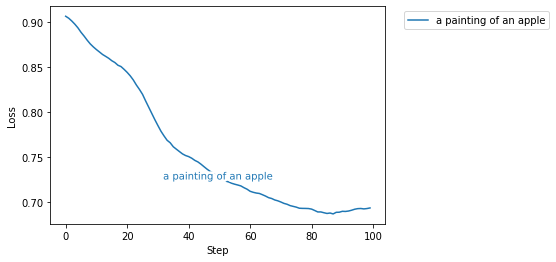

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
guide.plot_losses([ax])
# neat

In [44]:
#guide.dataframe # list of dfs for each ...loss?
len(guide.dataframe) # 4
[d.columns for d in guide.dataframe]

[Index(['a painting of an apple'], dtype='object'),
 Index(['smoothing loss (TV)'], dtype='object'),
 Index([], dtype='object'),
 Index(['TOTAL'], dtype='object')]

True

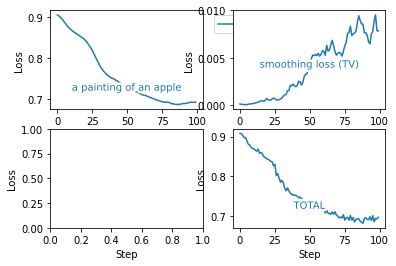

In [60]:
fig, axs = plt.subplots(2,2)
axs = axs[0,0], axs[0,1], axs[1,0], axs[1,1]
guide.plot_losses(axs) # overwrites rather than appending
# weird, but it ain't nothing I guess...
# this looks like a job for a lightning logger.

In [ ]:
# Maybe this is where pytti.make_hbox comes in?

In [63]:
dir(guide.image_rep)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'accum',
 'add_module',


In [47]:
# so... where's my output?

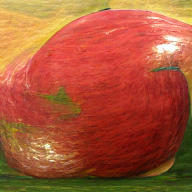

In [74]:
#dir(guide)
#dir(guide.image_rep)
#guide.image_rep.get_image_tensor() # not implemented
guide.image_rep.decode_image() # there we go